In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
file_path = "Telco-Customer-Churn.csv"
try:
    data = pd.read_csv(file_path)
    churn_data = pd.DataFrame(data)
    df = churn_data.copy()
    df.drop("customerID", axis=1, inplace=True)
except FileNotFoundError:
    print(f"No data set found: {file_path}")

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
columns_name=df.columns
print(columns_name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
# Our data consists of 7043 entries and 20 columns.
#SeniorCitizen, tenure, mountlycharges data are numeric while other variables are categorical.
#The TotalCharges property must consist of numeric data. So we convert the data in this column to int type.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [10]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
#It is detected that there are 11 missing data in the TotalCharges column.
#The missing data in TotalCharges is filled with 0, interpreted as the customer has not yet used the service.

In [12]:
df.fillna({"TotalCharges": 0}, inplace=True)

In [13]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [14]:
#When the SeniorCitizen data was analyzed, it was found that the values 0 and 1 should be changed to Yes and True.

In [15]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0:"No", 1:"Yes"})

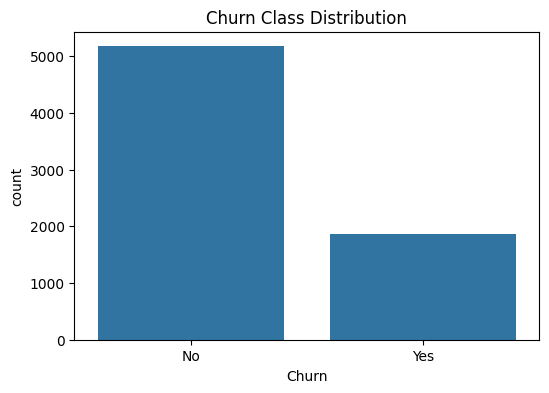

In [16]:
# Graph of the number of people who canceled their subscription and those who did not
# those who cancel are indicated with yes.
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=df)
plt.title("Churn Class Distribution")
plt.show()

Categorical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


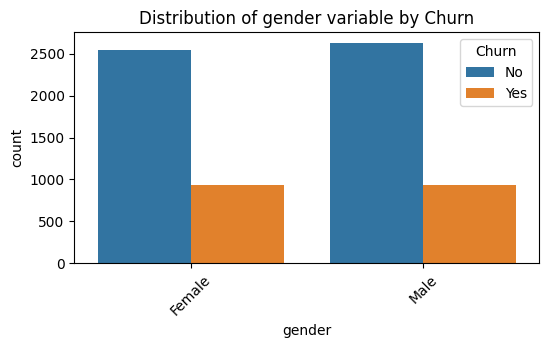

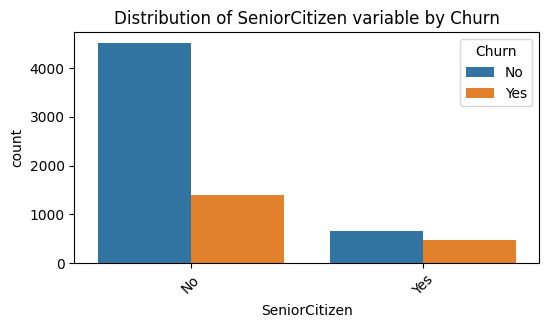

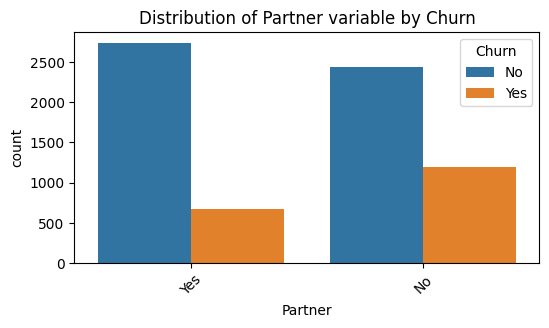

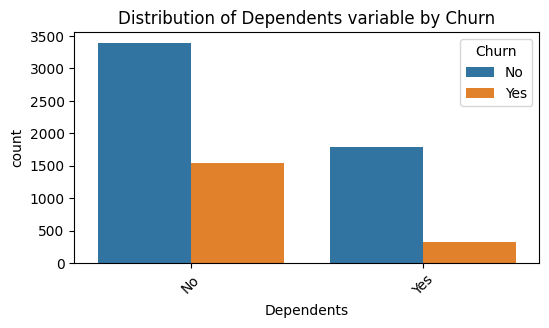

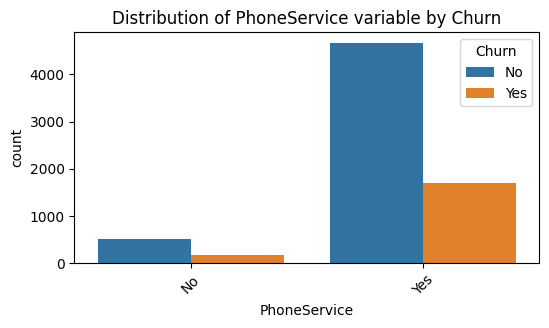

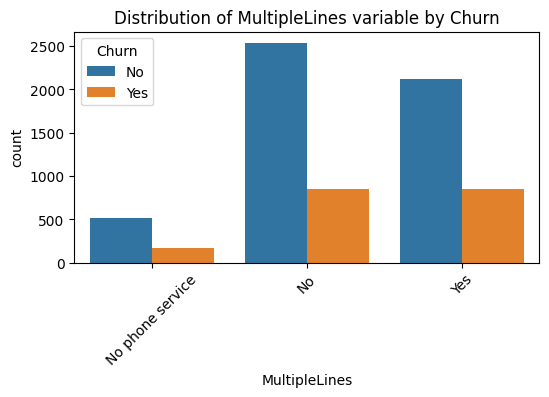

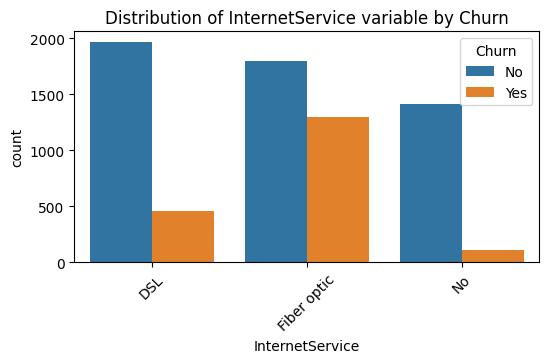

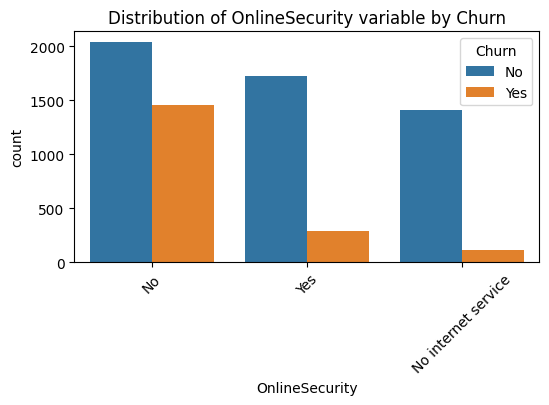

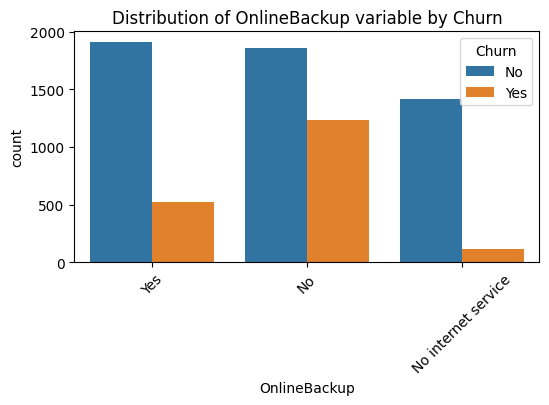

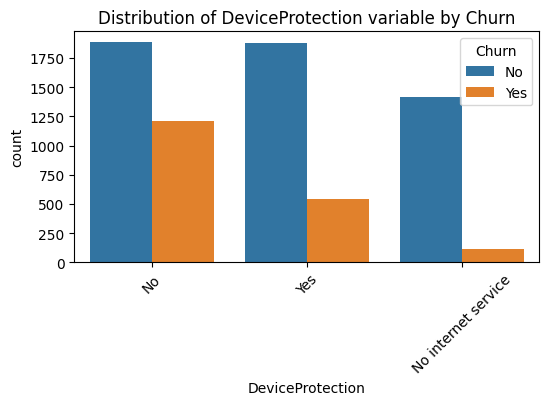

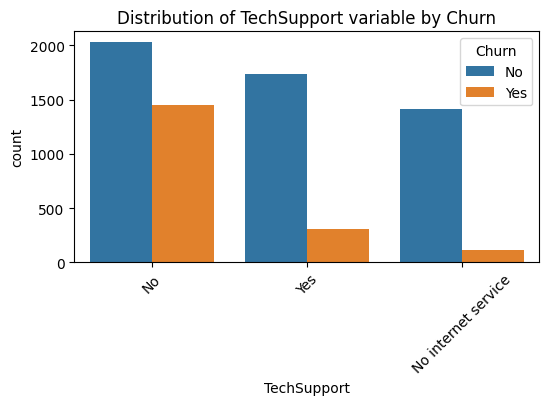

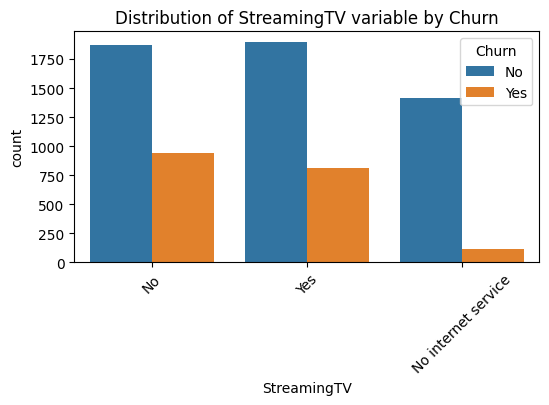

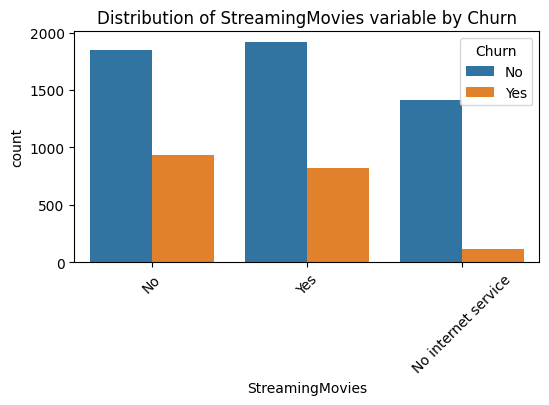

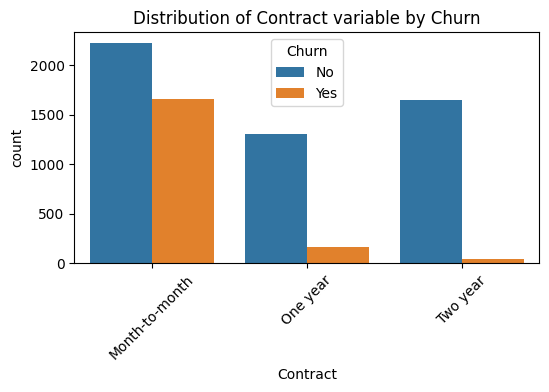

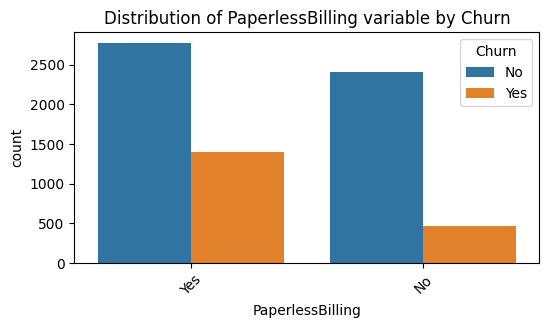

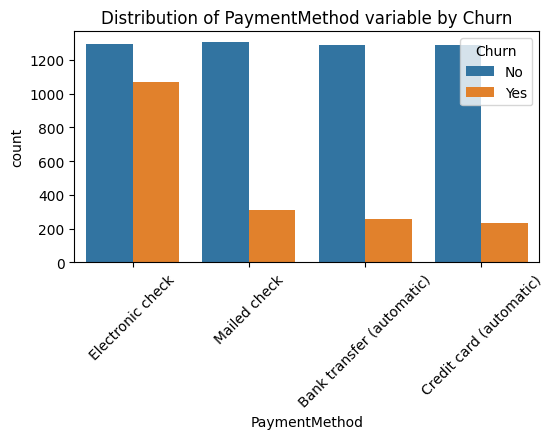

In [17]:
target = "Churn"
categorical_cols, numerical_cols = [], []
for col in columns_name:
    if col == target:
        continue
    if df[col].dtype == "object":
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f"Distribution of {col} variable by Churn")
    plt.xticks(rotation=45)
    plt.show();

In [18]:
for col in categorical_cols:
    col_churn = df.groupby(col)['Churn'].value_counts(normalize=True)
    print(col_churn)

gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: proportion, dtype: float64
SeniorCitizen  Churn
No             No       0.763938
               Yes      0.236062
Yes            No       0.583187
               Yes      0.416813
Name: proportion, dtype: float64
Partner  Churn
No       No       0.670420
         Yes      0.329580
Yes      No       0.803351
         Yes      0.196649
Name: proportion, dtype: float64
Dependents  Churn
No          No       0.687209
            Yes      0.312791
Yes         No       0.845498
            Yes      0.154502
Name: proportion, dtype: float64
PhoneService  Churn
No            No       0.750733
              Yes      0.249267
Yes           No       0.732904
              Yes      0.267096
Name: proportion, dtype: float64
MultipleLines     Churn
No                No       0.749558
                  Yes      0.250442
No phone service  No       0.750733
                  Yes  

### Analysis graphics
- The number of people who canceled their subscription is lower than those who did not cancel.
- On average, 26% of both men and women canceled their subscriptions.
### Demographics
- Elderly customers are more likely to cancel their subscriptions compared to younger customers
- Married customers are less likely to cancel their subscriptions compared to single customers.
- Customers with dependent family members (Dependents = Yes) show a lower cancellation rate.
### Phone Services
- Customers who do not receive phone service (PhoneService = No) have a slightly lower cancellation rate.
- Unsubscribe rate for those without a single line: 25%, unsubscribe rate for those with multiple lines: 28%
  Unsubscription rate for customers with no phone service (MultipleLines = No phone service):24%
### Internet Services
- DSL users have a lower cancellation rate compared to fiber optic users.
- Customers using online security, online backup, or tech support services are less likely to cancel their subscriptions.
### Billing and Contract
- Long-term contracts encourage customer retention.
- Customers using paperless billing are more likely to cancel their subscriptions.

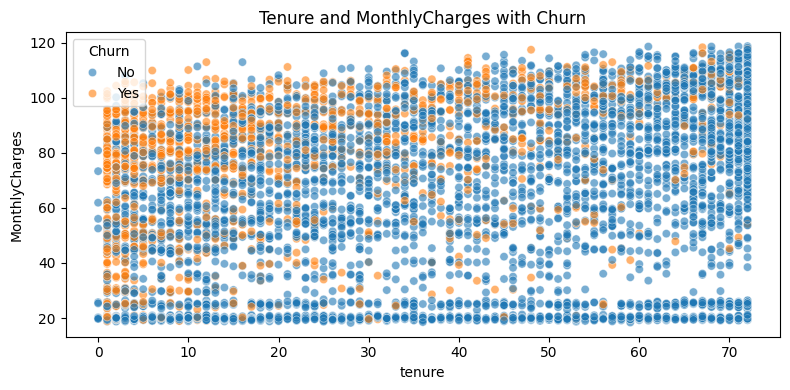

In [19]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue=target, alpha=0.6)
plt.title("Tenure and MonthlyCharges with Churn")
plt.tight_layout()
plt.show()

- We observe that customers with high monthly subscription fees leave the company in the first few months

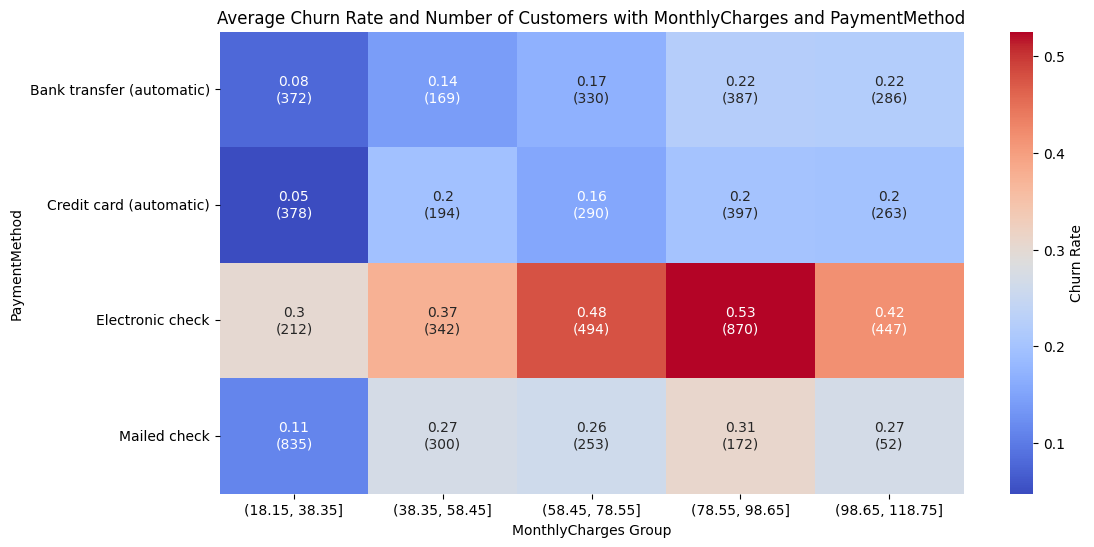

In [20]:
df['MonthlyChargesGroup'] = pd.cut(df['MonthlyCharges'], bins=5)
# Churn rate pivot table
churn_rate = df.pivot_table(values='Churn',
                            index='PaymentMethod',
                            columns='MonthlyChargesGroup',
                            observed=False,
                            aggfunc=lambda x: (x == 'Yes').mean())

# Costumer number pivot  table
customer_count = df.pivot_table(values='Churn',
                                index='PaymentMethod',
                                columns='MonthlyChargesGroup',
                                observed=False,
                                aggfunc='count')

# Rate and number of customer are combined
churn_rate_rounded = churn_rate.round(2)
combined_data = churn_rate_rounded.astype(str) + "\n(" + customer_count.astype(int).astype(str) + ")"

# Heatmap table
plt.figure(figsize=(12, 6))
sns.heatmap(churn_rate, annot=combined_data,  fmt="", cmap='coolwarm', cbar_kws={'label': 'Churn Rate'})
plt.title('Average Churn Rate and Number of Customers with MonthlyCharges and PaymentMethod')
plt.xlabel('MonthlyCharges Group')
plt.ylabel('PaymentMethod')
plt.show()

- The cancellation rate for those with Electronic Check payment method and high Monthly Charges is 0.53

In [21]:
df = df.drop(columns=['MonthlyChargesGroup'])

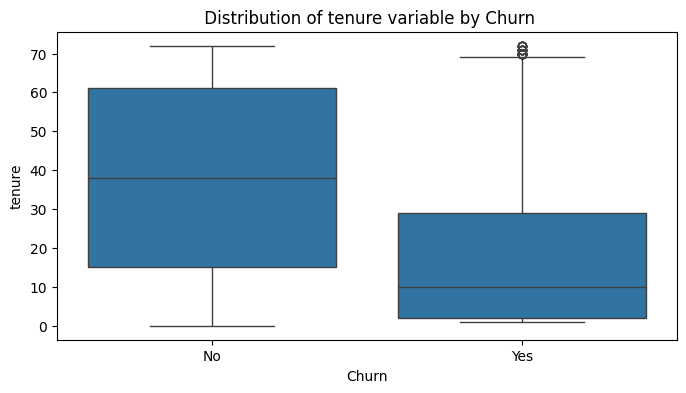

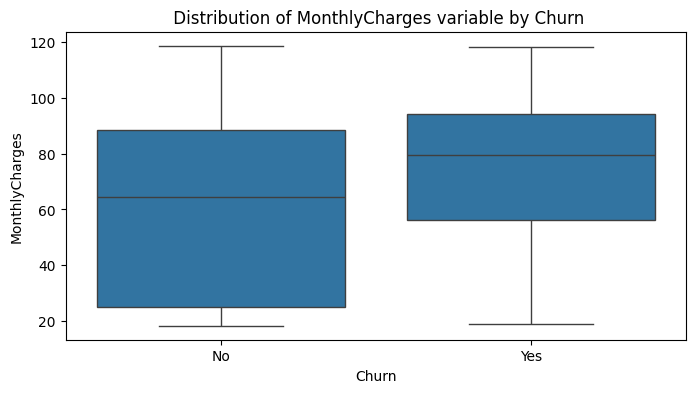

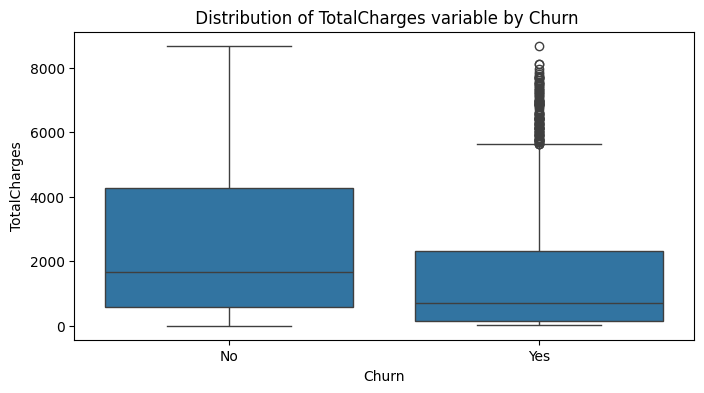

In [22]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f" Distribution of {col} variable by Churn")
    plt.show()

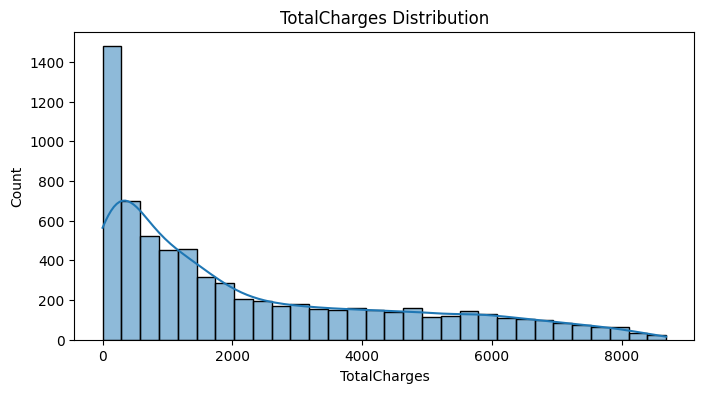

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.title("TotalCharges Distribution")
plt.show()

In [24]:
#right skew distribution
skewness = df['TotalCharges'].skew()
print(f"(Skewness): {skewness}")

def detect_outliers(data,column):
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
    clf.fit_predict(data[[column]])
    negative_factors = clf.negative_outlier_factor_
    threshold = -1.5
    print(np.sort(negative_factors))
    data= data[negative_factors >= threshold]
    return data

df  = detect_outliers(df,"TotalCharges")
print(df.shape)

(Skewness): 0.963234654832277
[-32.5657419  -32.5657419  -32.5657419  ...  -0.92443996  -0.92074234
  -0.91871234]
(6967, 20)


In [25]:
df = detect_outliers(df,"tenure")

[-1. -1. -1. ... -1. -1. -1.]


In [26]:
df['HighRiskCustomers'] = ((df['PaymentMethod'] == 'Electronic check') &
                           (df['MonthlyCharges'] > df['MonthlyCharges'].quantile(0.8))).astype(int)

In [27]:
#Encoding
for col in categorical_cols:
    df[col] = df[col].astype("category")

In [28]:
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6967 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 6967 non-null   int64  
 1   MonthlyCharges                         6967 non-null   float64
 2   TotalCharges                           6967 non-null   float64
 3   Churn                                  6967 non-null   object 
 4   HighRiskCustomers                      6967 non-null   int64  
 5   gender_Male                            6967 non-null   bool   
 6   SeniorCitizen_Yes                      6967 non-null   bool   
 7   Partner_Yes                            6967 non-null   bool   
 8   Dependents_Yes                         6967 non-null   bool   
 9   PhoneService_Yes                       6967 non-null   bool   
 10  MultipleLines_No phone service         6967 non-null   bool   
 11  MultipleL

In [30]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [31]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,HighRiskCustomers,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,0,True,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,0,False,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [32]:
df['MonthlySpend'] = df['TotalCharges'] / df['tenure']

In [33]:
# Standardizasyon
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print(df[numerical_cols].head())

     tenure  MonthlyCharges  TotalCharges
0 -1.294418       -1.172950     -1.003151
1  0.054041       -0.269854     -0.181548
2 -1.253556       -0.373160     -0.968557
3  0.503528       -0.758059     -0.203086
4 -1.253556        0.188360     -0.949339


In [34]:
df_cleaned = df.dropna()
X = df_cleaned.drop(columns=['Churn'])
y = df_cleaned['Churn']
print(type(X))
print(type(y))
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(6967, 32) (6967,)


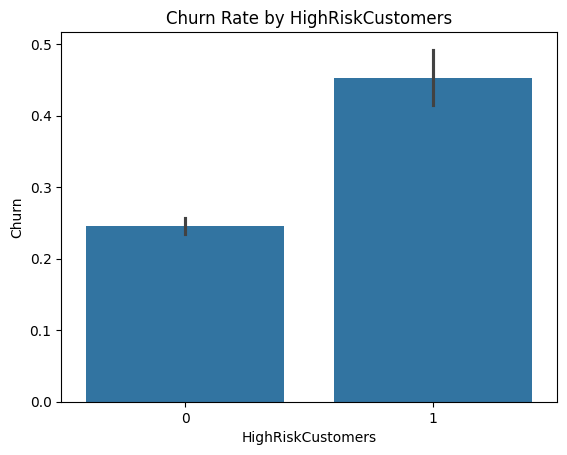

In [35]:
sns.barplot(x='HighRiskCustomers', y='Churn', data=df)
plt.title('Churn Rate by HighRiskCustomers')
plt.show()

In [36]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

                                  Feature  Importance
2                            TotalCharges    0.166329
0                                  tenure    0.150271
1                          MonthlyCharges    0.131580
31                           MonthlySpend    0.130972
11            InternetService_Fiber optic    0.038802
29         PaymentMethod_Electronic check    0.037256
26                      Contract_Two year    0.029130
4                             gender_Male    0.024047
27                   PaperlessBilling_Yes    0.023371
14                     OnlineSecurity_Yes    0.023070
20                        TechSupport_Yes    0.021690
6                             Partner_Yes    0.019992
25                      Contract_One year    0.019950
16                       OnlineBackup_Yes    0.018625
10                      MultipleLines_Yes    0.017715
7                          Dependents_Yes    0.017375
5                       SeniorCitizen_Yes    0.017231
18                   DeviceP

In [37]:
# Logistic Regression

In [38]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
y_pred = loj_model.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1043
           1       0.62      0.49      0.55       351

    accuracy                           0.79      1394
   macro avg       0.73      0.69      0.71      1394
weighted avg       0.78      0.79      0.79      1394



In [40]:
accuracy_score(y_test, y_pred)

0.7948350071736011

In [41]:
#Model Tuning for Logistic Regression

In [42]:
log_reg = LogisticRegression(class_weight='balanced',max_iter=3000)
log_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga'], 'penalty': ['l2', 'l1']}
log_cv = GridSearchCV(log_reg, log_params, cv=5, scoring='accuracy',error_score='raise')

log_cv.fit(X_train, y_train)
best_params = log_cv.best_params_
print("Best parameters:", log_cv.best_params_)

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [43]:
log_reg_best = LogisticRegression(**best_params)
log_reg_best.fit(X_train, y_train)
y_pred = log_reg_best.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_lg :.2f}")
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1043
           1       0.65      0.46      0.54       351

    accuracy                           0.80      1394
   macro avg       0.74      0.69      0.70      1394
weighted avg       0.79      0.80      0.79      1394



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [44]:
#SVM

In [45]:
svm_model = SVC(kernel = "linear", probability=True ).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7984218077474893

In [46]:
#Model Tuning for SVM

In [47]:
svc_params = {"C": np.arange(1,10), "kernel": ["linear", "rbf", "poly", "sigmoid"]}
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, cv = 10, n_jobs = -1, verbose = 2 )
svc_cv_model.fit(X_train, y_train)
print("Best parameters: " + str(svc_cv_model.best_params_))
svc_tuned = SVC(**svc_cv_model.best_params_).fit(X_train, y_train)
y_pred = svc_tuned.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best parameters: {'C': 5, 'kernel': 'linear'}


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1043
           1       0.62      0.50      0.56       351

    accuracy                           0.80      1394
   macro avg       0.73      0.70      0.71      1394
weighted avg       0.79      0.80      0.79      1394



In [49]:
#Random Forest Classifier

In [50]:
rf_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7905308464849354

In [51]:
#Model Tuning for Random Forest Classifier

In [52]:
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_cv_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params,cv=5, n_jobs=-1)
rf_cv_model.fit(X_train, y_train)
print("Best parameters:", rf_cv_model.best_params_)
rf_tuned = RandomForestClassifier(random_state=42, **rf_cv_model.best_params_)
rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1043
           1       0.61      0.44      0.52       351

    accuracy                           0.79      1394
   macro avg       0.72      0.68      0.69      1394
weighted avg       0.77      0.79      0.78      1394



                                  Feature  Importance
0                                  tenure    0.177401
2                            TotalCharges    0.153355
31                           MonthlySpend    0.097485
1                          MonthlyCharges    0.097180
11            InternetService_Fiber optic    0.064794
29         PaymentMethod_Electronic check    0.056715
26                      Contract_Two year    0.046770
25                      Contract_One year    0.029942
14                     OnlineSecurity_Yes    0.027893
20                        TechSupport_Yes    0.025084
27                   PaperlessBilling_Yes    0.017276
4                             gender_Male    0.015504
16                       OnlineBackup_Yes    0.014313
6                             Partner_Yes    0.013786
10                      MultipleLines_Yes    0.013315
5                       SeniorCitizen_Yes    0.012951
7                          Dependents_Yes    0.011740
18                   DeviceP

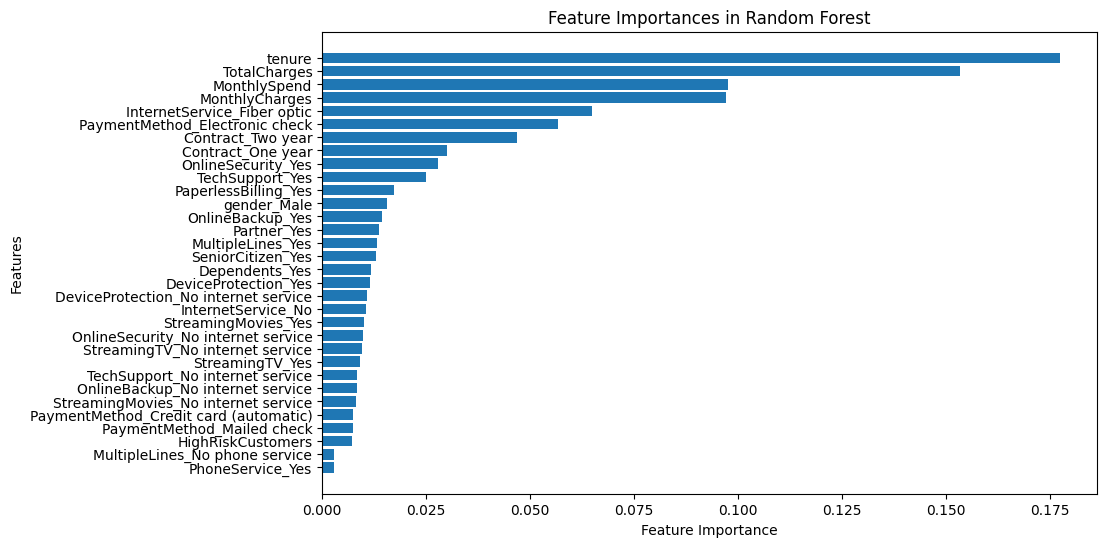

In [53]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_tuned.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in Random Forest")
plt.gca().invert_yaxis()
plt.show()

- Attributes with more importance in the dataset: tenure ,TotalCharges ,MonthlyCharges

In [54]:
# Decision Tree Classifier

In [55]:
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7245337159253945

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1043
           1       0.46      0.49      0.47       351

    accuracy                           0.72      1394
   macro avg       0.64      0.65      0.64      1394
weighted avg       0.73      0.72      0.73      1394



In [56]:
# Model Tuning for Decision Tree Classifier

In [57]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

best_params = grid_search.best_params_
dt_optimized = DecisionTreeClassifier(**best_params, random_state=42)
dt_optimized.fit(X_train, y_train)
y_pred_optimized = dt_optimized.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_optimized)
print("Optimized Decision Tree Accuracy:",accuracy_dt)
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimized Decision Tree Accuracy: 0.7840746054519369

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1043
           1       0.59      0.49      0.53       351

    accuracy                           0.78      1394
   macro avg       0.71      0.69      0.70      1394
weighted avg       0.77      0.78      0.78      1394



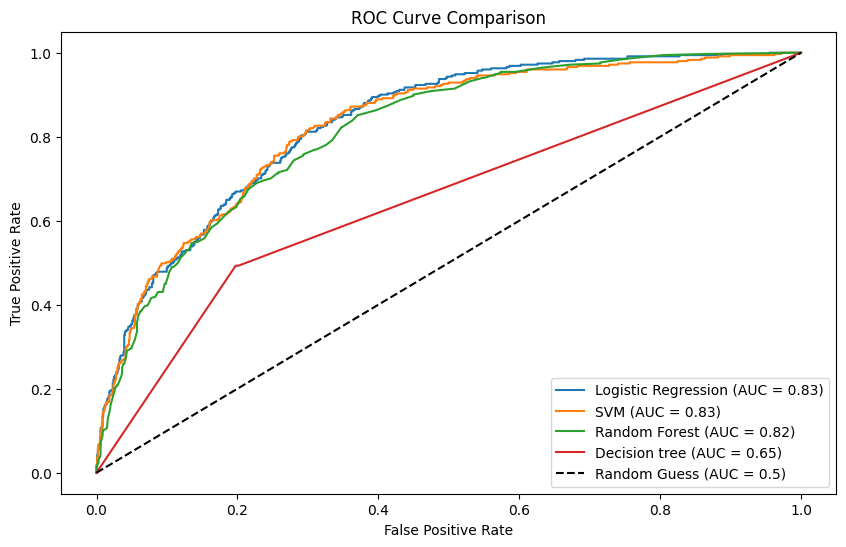

In [58]:
# Logistic Regression
log_reg_prob = loj_model.predict_proba(X_test)[:, 1]

# SVM
svc_prob = svm_model.predict_proba(X_test)[:, 1]

# Random Forest
rf_prob = rf_model.predict_proba(X_test)[:, 1]

#Decision Tree
dt_prob = dt_model.predict_proba(X_test)[:, 1]

# Logistic Regression ROC
log_fpr, log_tpr, _ = roc_curve(y_test, log_reg_prob)
log_auc = roc_auc_score(y_test, log_reg_prob)

# SVM ROC
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_prob)
svc_auc = roc_auc_score(y_test, svc_prob)

# Random Forest ROC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
rf_auc = roc_auc_score(y_test, rf_prob)

# Decision Tree ROC
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
dt_auc = roc_auc_score(y_test, dt_prob)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(log_fpr, log_tpr, label=f"Logistic Regression (AUC = {log_auc:.2f})")
plt.plot(svc_fpr, svc_tpr, label=f"SVM (AUC = {svc_auc:.2f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision tree (AUC = {dt_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


                   Models   Accuracy
0  DecisionTreeClassifier  72.453372
1      LogisticRegression  79.626973
2                     SVC  79.842181
3  RandomForestClassifier  78.622669


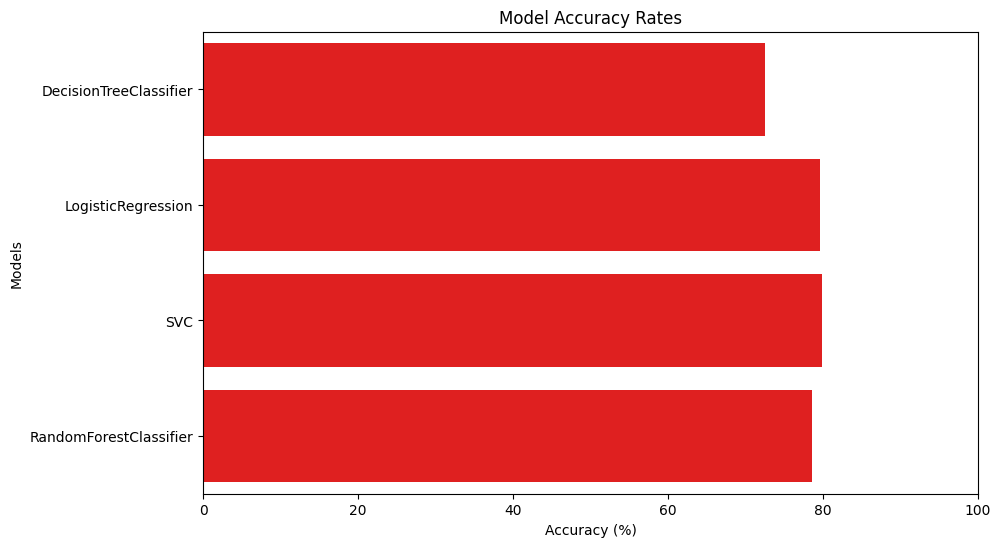

In [59]:
# comparison
models = [
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(random_state=42, max_iter=1000),
    SVC(kernel="linear", probability=True, random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

for model in models:
    model.fit(X_train, y_train)
results_list = []
results = pd.DataFrame(columns=["Modeller", "Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results_list.append([names, acc * 100])

results = pd.DataFrame(results_list, columns=["Models", "Accuracy"])
print(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Models', data=results, color="r")
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')
plt.title('Model Accuracy Rates')
plt.xlim(0, 100)
plt.show()



                   Models   Accuracy
0  DecisionTreeClassifier  78.407461
1      LogisticRegression  80.057389
2                     SVC  79.770445
3  RandomForestClassifier  78.981349


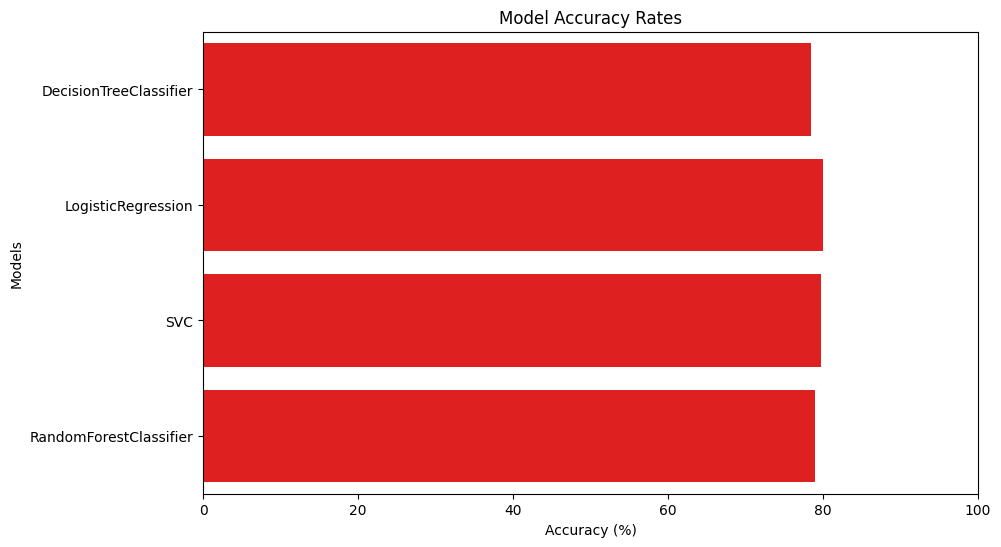

In [60]:
# comparison with Model Tuning
accuracy_results = {
    "DecisionTreeClassifier":accuracy_dt *100,
    "LogisticRegression":accuracy_lg *100,
    "SVC": accuracy_svc *100,
    "RandomForestClassifier":accuracy_rf *100
}

results = pd.DataFrame(list(accuracy_results.items()), columns=["Models", "Accuracy"])

print(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Models', data=results, color="r")
plt.xlabel('Accuracy (%)')
plt.ylabel('Models')
plt.title('Model Accuracy Rates')
plt.xlim(0, 100)
plt.show()

In [61]:
df.columns = df.columns.str.strip()
important_features = feature_importances[feature_importances["Importance"] > 0.01]["Feature"].tolist()
unimportant_features = feature_importances[feature_importances["Importance"] <= 0.01]["Feature"].tolist()

df_cleaned = df.drop(columns=unimportant_features)


X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

loj = LogisticRegression(C=0.01,solver = "saga", penalty= 'l2' )
loj_model = loj.fit(X_train_reduced,y_train)
y_pred_reduced  = loj_model.predict(X_test_reduced)
# 6. Performansı karşılaştırın
print("Accuracy (Reduced Features):", accuracy_score(y_test, y_pred_reduced))
print("\nOptimized Classification Report:\n", classification_report(y_test,y_pred_reduced))

Accuracy (Reduced Features): 0.8048780487804879

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1043
           1       0.66      0.47      0.55       351

    accuracy                           0.80      1394
   macro avg       0.75      0.69      0.71      1394
weighted avg       0.79      0.80      0.79      1394



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [62]:
#SMOTE

In [63]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original dataset")
print(y_train.value_counts())
print("Resampled dataset class distribution:")
print(pd.Series(y_train_resampled).value_counts())

Original dataset
Churn
0    4081
1    1492
Name: count, dtype: int64
Resampled dataset class distribution:
Churn
1    4081
0    4081
Name: count, dtype: int64


In [64]:
#Logistic Regresyon with Smote
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train_resampled,y_train_resampled)
y_pred = loj_model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1043
           1       0.51      0.66      0.57       351

    accuracy                           0.75      1394
   macro avg       0.69      0.72      0.70      1394
weighted avg       0.78      0.75      0.76      1394



0.7532281205164992

In [65]:
log_reg = LogisticRegression(class_weight='balanced',max_iter=3000)
log_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga'], 'penalty': ['l2', 'l1']}
log_cv = GridSearchCV(log_reg, log_params, cv=5, scoring='accuracy',error_score='raise')

log_cv.fit(X_train, y_train)
best_params = log_cv.best_params_
print("Best parameters:", log_cv.best_params_)

log_reg_best = LogisticRegression(**best_params)
log_reg_best.fit(X_train_resampled,y_train_resampled)
y_pred = log_reg_best.predict(X_test)
accuracy_lg = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy_lg :.2f}")
print(classification_report(y_test, y_pred))


Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1043
           1       0.50      0.71      0.59       351

    accuracy                           0.75      1394
   macro avg       0.70      0.74      0.71      1394
weighted avg       0.79      0.75      0.76      1394



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [66]:
#SVM
svm_model = SVC(kernel = "linear",probability=True ).fit(X_train_resampled, y_train_resampled)
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1043
           1       0.52      0.65      0.58       351

    accuracy                           0.76      1394
   macro avg       0.70      0.72      0.71      1394
weighted avg       0.78      0.76      0.77      1394



In [67]:
svc_params = {"C": np.arange(1,10), "kernel": ["linear", "rbf", "poly", "sigmoid"] }
svc = SVC()
svc_cv_model = GridSearchCV(svc,svc_params, cv = 10, n_jobs = -1, verbose = 2 )
svc_cv_model.fit(X_train_resampled, y_train_resampled)
print("Best parameters: " + str(svc_cv_model.best_params_))
svc_tuned = SVC(**svc_cv_model.best_params_).fit(X_train_resampled, y_train_resampled)
y_pred = svc_tuned.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best parameters: {'C': 9, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1043
           1       0.52      0.64      0.57       351

    accuracy                           0.76      1394
   macro avg       0.69      0.72      0.70      1394
weighted avg       0.78      0.76      0.77      1394



In [68]:
#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100).fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1043
           1       0.57      0.57      0.57       351

    accuracy                           0.78      1394
   macro avg       0.71      0.71      0.71      1394
weighted avg       0.78      0.78      0.78      1394



In [69]:
rf_params = {'n_estimators': [100, 200, 500], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_cv_model = GridSearchCV(RandomForestClassifier(random_state=42), rf_params,cv=5, n_jobs=-1)
rf_cv_model.fit(X_train_resampled, y_train_resampled)
print("Best parameters:", rf_cv_model.best_params_)
rf_tuned = RandomForestClassifier(random_state=42, **rf_cv_model.best_params_)
rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1043
           1       0.62      0.47      0.54       351

    accuracy                           0.80      1394
   macro avg       0.73      0.69      0.70      1394
weighted avg       0.78      0.80      0.79      1394



In [70]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42).fit(X_train_resampled, y_train_resampled)
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7309899569583931
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1043
           1       0.47      0.54      0.50       351

    accuracy                           0.73      1394
   macro avg       0.65      0.67      0.66      1394
weighted avg       0.74      0.73      0.74      1394



In [71]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
# Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

best_params = grid_search.best_params_
dt_optimized = DecisionTreeClassifier(**best_params, random_state=42)
dt_optimized.fit(X_train_resampled, y_train_resampled)
accuracy_dt = accuracy_score(y_test, y_pred_optimized)
y_pred_optimized = dt_optimized.predict(X_test)
print("Optimized Decision Tree Accuracy:",accuracy_dt)
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_optimized))


Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimized Decision Tree Accuracy: 0.7840746054519369

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1043
           1       0.51      0.68      0.58       351

    accuracy                           0.76      1394
   macro avg       0.70      0.73      0.71      1394
weighted avg       0.79      0.76      0.77      1394

